# **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import librosa
import librosa.display

import os

sns.set(style="whitegrid")

# **Load Dataset**

The dataset we're using here is the **GTZAN dataset**, a  popular audio collection dataset containing 1000 audio files recorded from CDs and other sources.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/MyDrive/GTZAN_Dataset'
df = pd.read_csv(f'{folder_path}/features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
df.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [ ]:
df_without_filename = df.copy().drop(columns=['filename'])

In [ ]:
df_without_filename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   length                   9990 non-null   int64  
 1   chroma_stft_mean         9990 non-null   float64
 2   chroma_stft_var          9990 non-null   float64
 3   rms_mean                 9990 non-null   float64
 4   rms_var                  9990 non-null   float64
 5   spectral_centroid_mean   9990 non-null   float64
 6   spectral_centroid_var    9990 non-null   float64
 7   spectral_bandwidth_mean  9990 non-null   float64
 8   spectral_bandwidth_var   9990 non-null   float64
 9   rolloff_mean             9990 non-null   float64
 10  rolloff_var              9990 non-null   float64
 11  zero_crossing_rate_mean  9990 non-null   float64
 12  zero_crossing_rate_var   9990 non-null   float64
 13  harmony_mean             9990 non-null   float64
 14  harmony_var             

In [ ]:
print(df_without_filename['label'].value_counts())

label
blues        1000
jazz         1000
metal        1000
pop          1000
reggae       1000
disco         999
classical     998
hiphop        998
rock          998
country       997
Name: count, dtype: int64


## Understanding Audio Data

**Understanding the Components**
* **Sound**: In the context of digital audio, sound is represented by a sequence of digital values that approximate the air pressure variations of an audio signal over time.
* **Sample Rate**: The sample rate is the number of samples (digital audio values) captured per second to represent the audio signal. It's measured in Hertz (Hz), where 1 Hz equals 1 sample per second.  
Common sample rates are 44100 Hz (CD quality), 22050 Hz (often used in processing for its balance between quality and computational efficiency), and 16000 Hz (common in speech recognition tasks).

Lets inspect the audio file, specifically 'blues.00000' track

In [ ]:
y, sr = librosa.load(f'{folder_path}/genres_original/blues/blues.00000.wav')

print(f"Audio time series: {y[:10]}...")
print(f"Sampling rate (KHz): {sr}")

Audio time series: [ 0.00732422  0.01660156  0.00762939 -0.00350952 -0.0022583  -0.0093689
 -0.02267456 -0.02236938 -0.03128052 -0.04330444]...
Sampling rate (KHz): 22050


**Audio time series**: a 1-dimensional array of floating-point numbers representing the audio signal, showing the amplitude of the audio at each sampled point.  


#### **Visualizing the Waveform**  
To get a visual sense of the audio amplitude over time


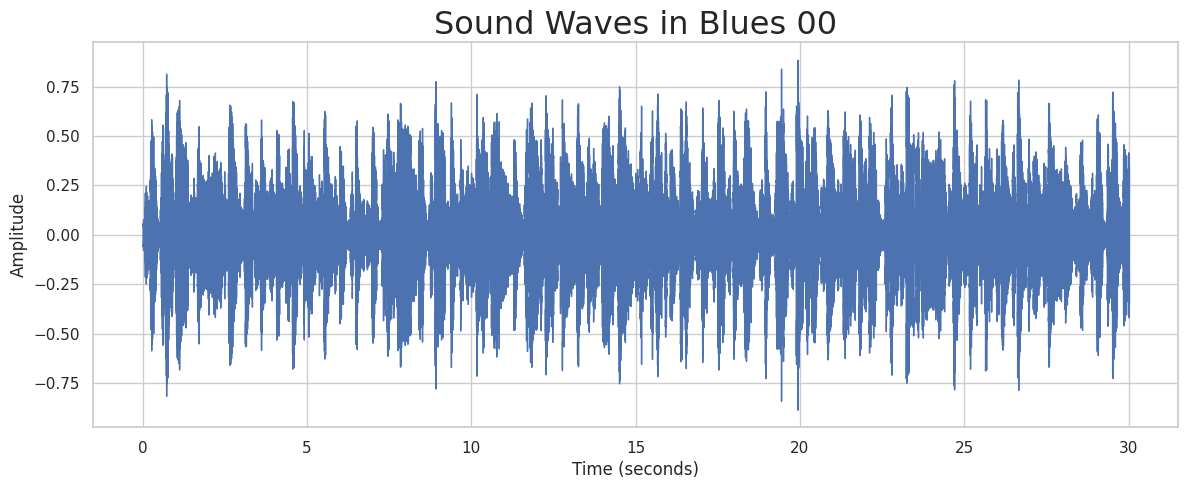

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title("Sound Waves in Blues 00", fontsize = 23);
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

#### **Spectogram**  
To get a visual representation of signal strength or "loudness" at various frequencies


**Spectrogram**: A visual representation showing the intensity (loudness) of various frequencies over time. It's created by applying the Short-Time Fourier Transform (STFT) to the audio signal, which splits the signal into short segments and analyzes the frequency content of each segment.  
**STFT** (librosa.stft): Short-Time Fourier Transform, a method to analyze the frequency and phase content of local sections of a signal as it changes over time.


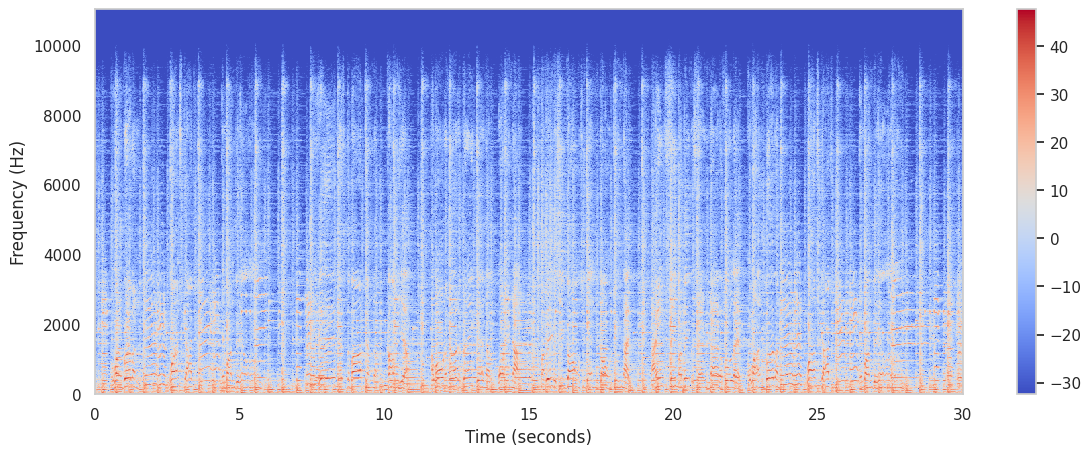

In [ ]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.show()


#### **Mel Spectogram**    

**Mel Spectrogram**: Similar to a regular spectrogram but uses the Mel scale for the frequency axis. The Mel scale more closely approximates the human auditory system's response, emphasizing frequencies to which humans are more sensitive.  
**Mel Scale**: A perceptual scale of pitches judged by listeners to be equal in distance from one another. The scale is based on the pitch of sounds rather than their frequency, aligning more closely with human hearing.

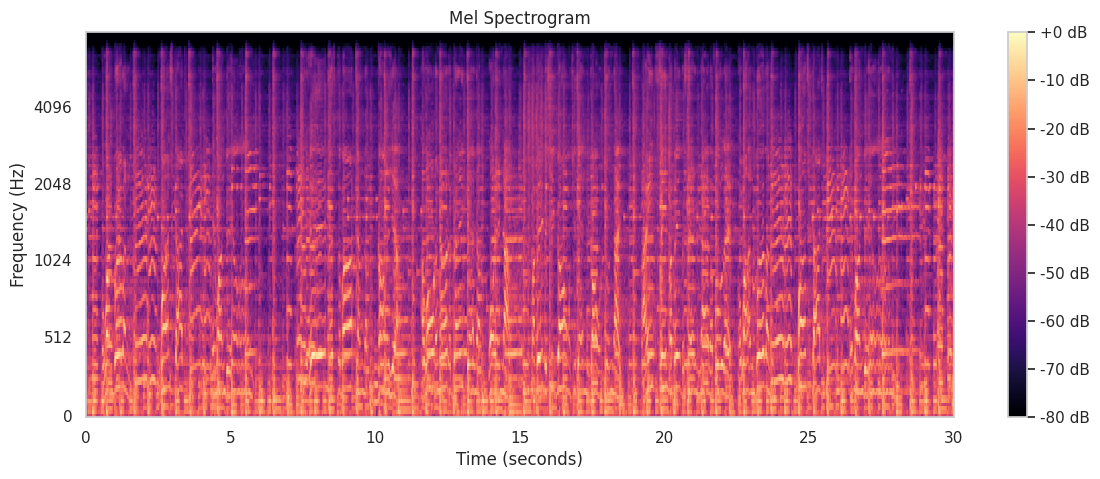

In [ ]:
mel = librosa.feature.melspectrogram(y=y, sr=sr)
mel_db = librosa.power_to_db(mel, ref=np.max)

plt.figure(figsize=(14, 5))
librosa.display.specshow(mel_db, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.show()


## Audio Features

### **Zero Crossing Rate (ZCR)**  
The rate at which the audio signal changes sign (from positive to negative or back). It can be an indicator of the noisiness or the percussiveness of the sound.

Zero Crossing Rate shape: (1, 1293)


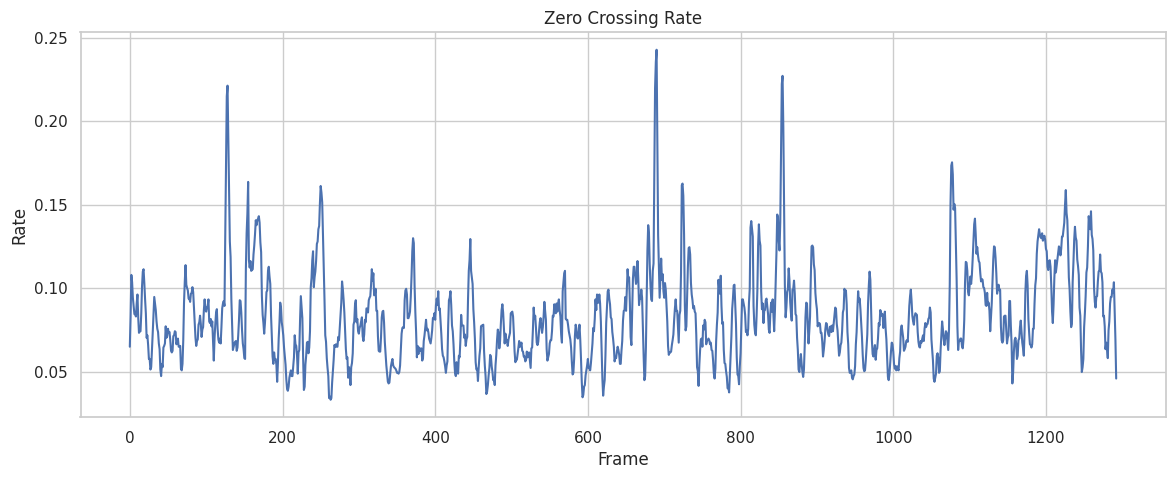

In [ ]:
zcr = librosa.feature.zero_crossing_rate(y)
print(f"Zero Crossing Rate shape: {zcr.shape}")

plt.figure(figsize=(14, 5))
plt.plot(zcr[0])
plt.title('Zero Crossing Rate')
plt.xlabel('Frame')
plt.ylabel('Rate')
plt.show()

### **Spectral Centroid**  
indicates where the "center of mass" for a sound is located and is perceived as its brightness.

Spectral Centroid shape: (1293, 1)


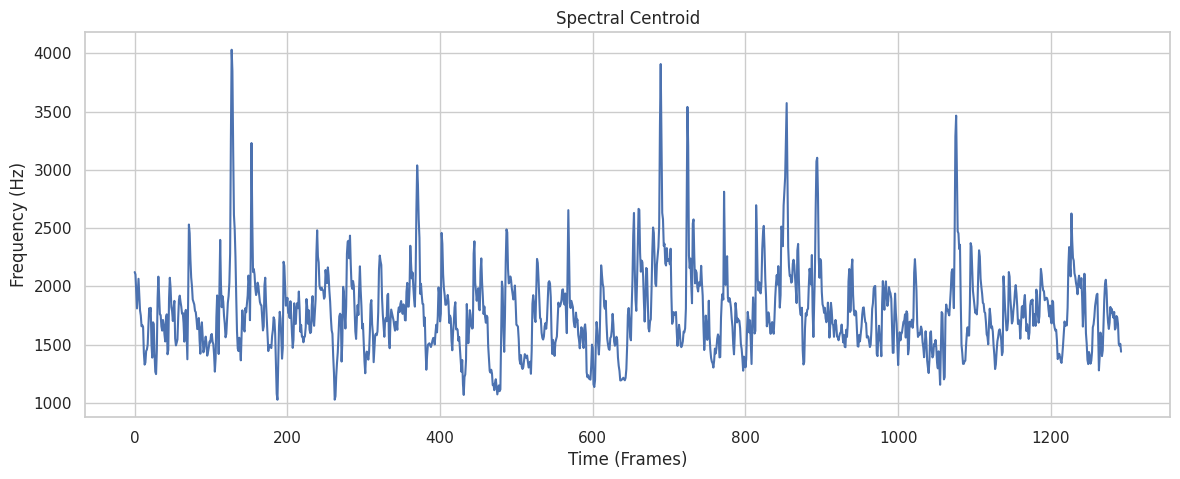

In [ ]:
spec_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
spec_centroid = spec_centroid.T
print(f"Spectral Centroid shape: {spec_centroid.shape}")

plt.figure(figsize=(14, 5))
plt.plot(spec_centroid)
plt.title('Spectral Centroid')
plt.xlabel('Time (Frames)')
plt.ylabel('Frequency (Hz)')
plt.show()

### **Chroma Frequencies**  
Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.

Chroma shape: (12, 1293)


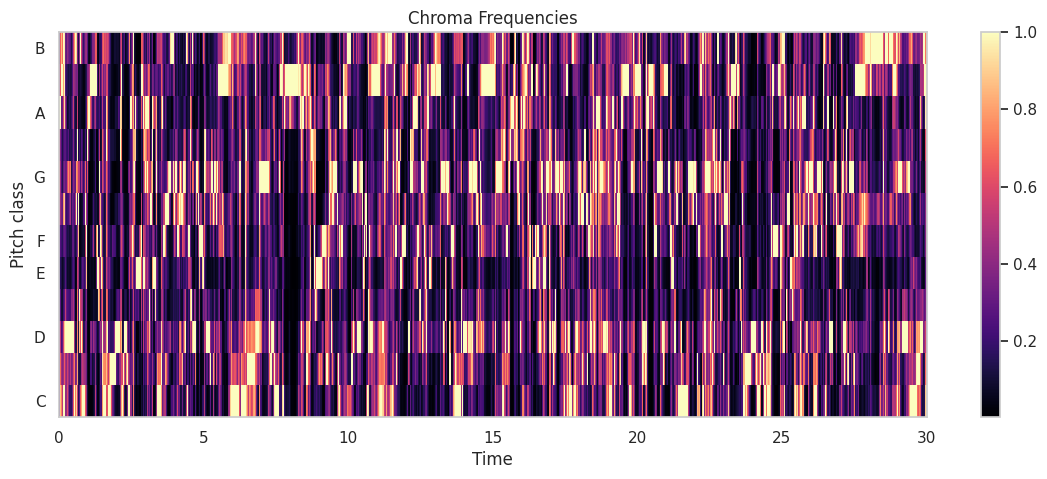

In [ ]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
print(f"Chroma shape: {chroma.shape}")

plt.figure(figsize=(14, 5))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chroma Frequencies')
plt.show()

### **Mel-Frequency Cepstral Coefficients**   
The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

MFCC shape: (13, 1293)


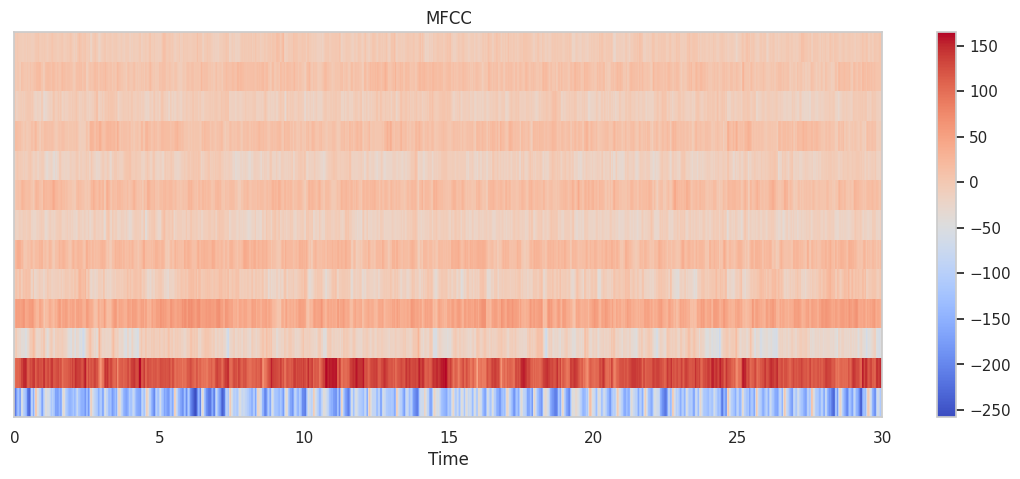

In [ ]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
print(f"MFCC shape: {mfccs.shape}")

plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()

# **Dataset Analysis**

In [ ]:
df_without_filename.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


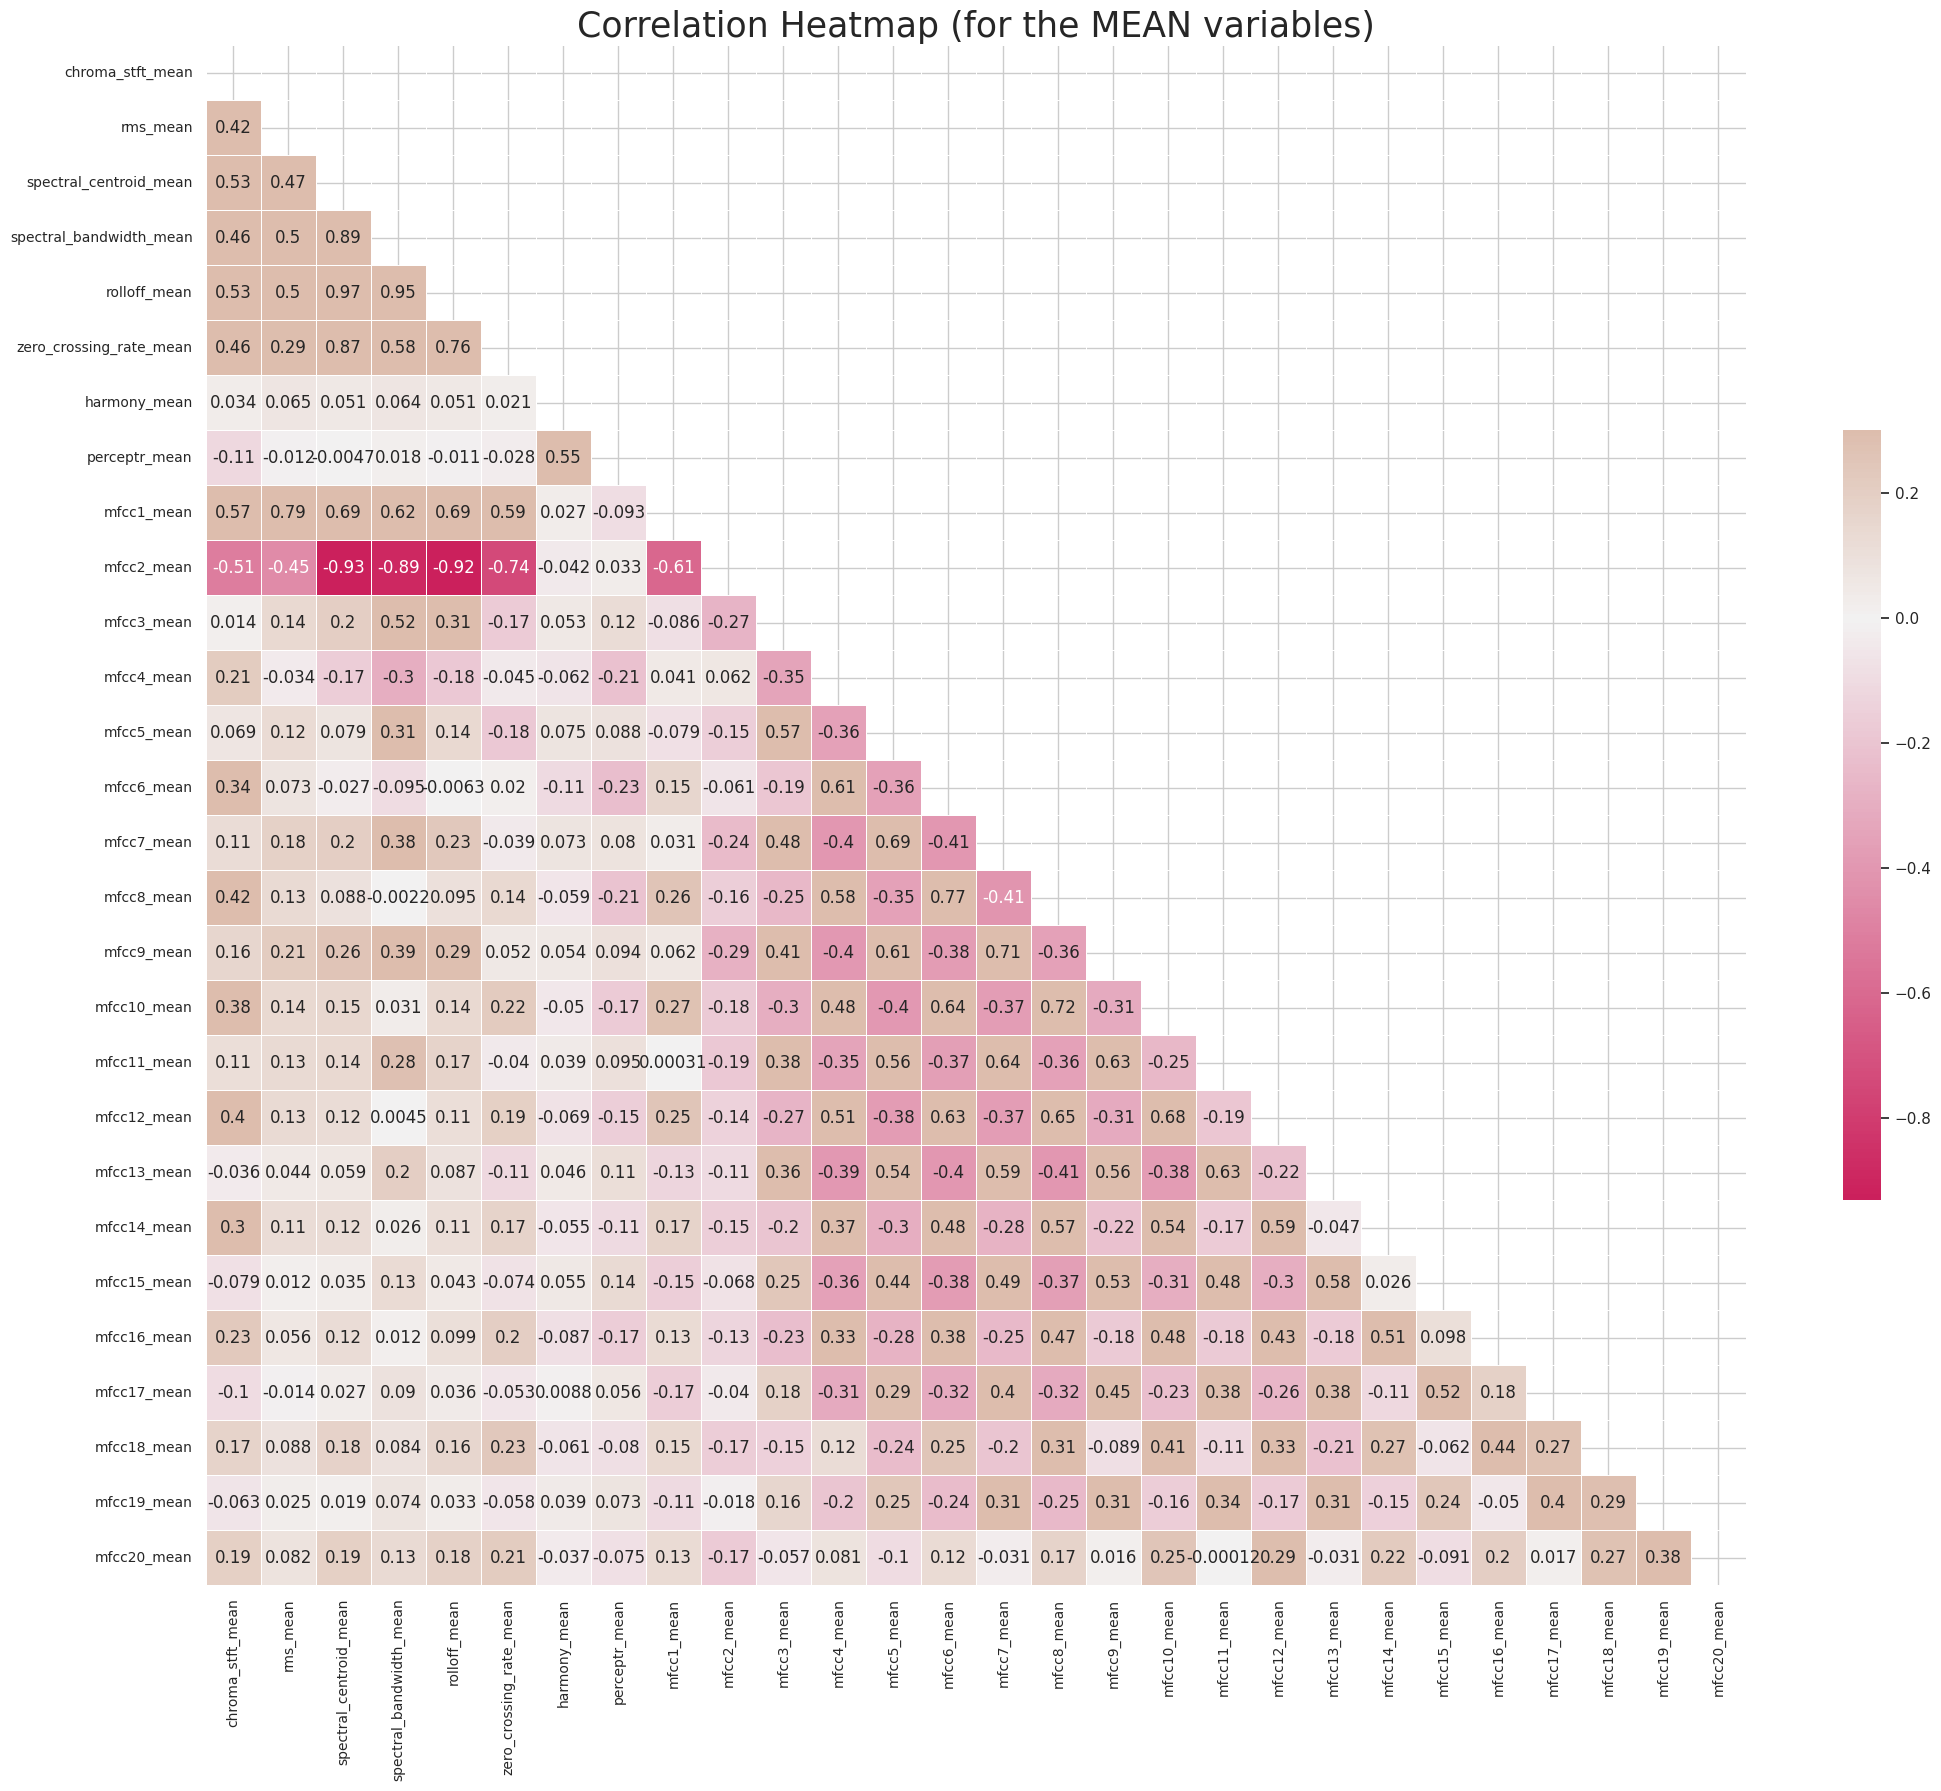

In [ ]:
spike_cols = [col for col in df_without_filename.columns if 'mean' in col]
corr = df_without_filename[spike_cols].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(25, 20));

cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr Heatmap.jpg")

### Checking for the dataset balance
It seems that this dataset is well balanced so we won't need to balance it out

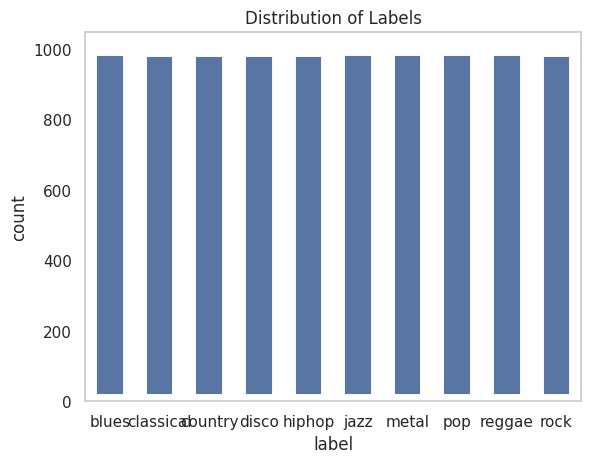

In [ ]:
label_counts = df_without_filename['label'].value_counts()
sns.countplot(x='label', data=df_without_filename, linewidth=10)
plt.title('Distribution of Labels')
plt.show()

### Feature Distributions



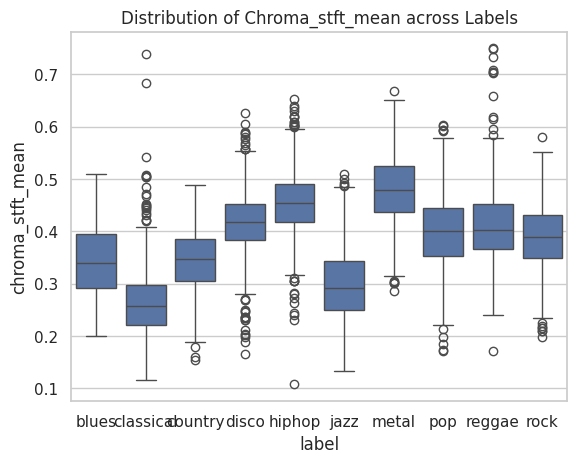

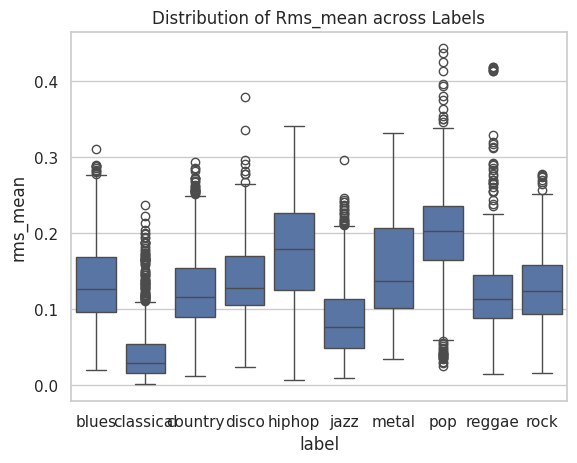

In [ ]:
sns.boxplot(x=df_without_filename['label'], y=df_without_filename['chroma_stft_mean'])
plt.title('Distribution of Chroma_stft_mean across Labels')
plt.show()

sns.boxplot(x=df_without_filename['label'], y=df_without_filename['rms_mean'])
plt.title('Distribution of Rms_mean across Labels')
plt.show()

###Feature Importance

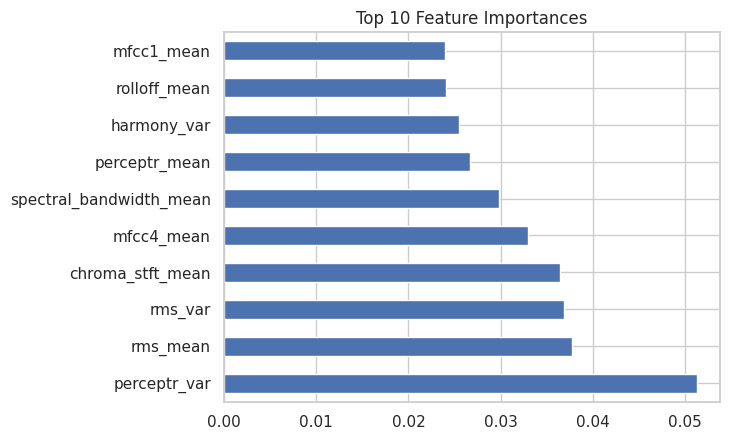

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df_without_filename.drop(columns=['label', 'length'])
y = df_without_filename['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

###Distribution of Audio Lengths
All of them seems to be the same length

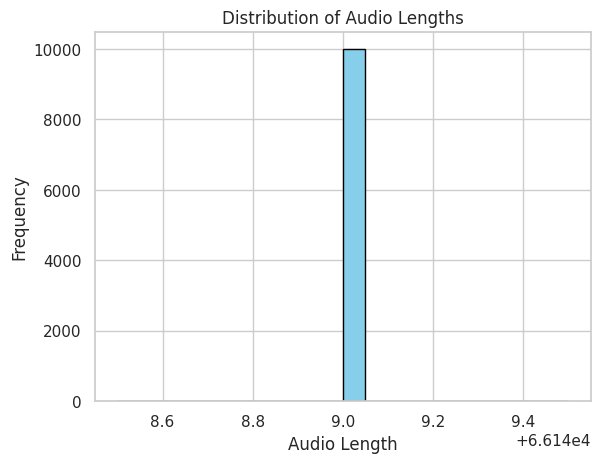

In [ ]:
plt.hist(df_without_filename['length'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Audio Length')
plt.ylabel('Frequency')
plt.title('Distribution of Audio Lengths')
plt.show()

### Relationships between Audio Length and Other Features

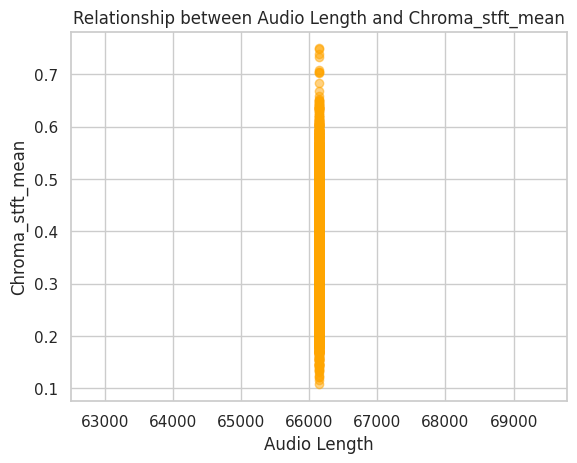

In [ ]:
plt.scatter(df_without_filename['length'], df_without_filename['chroma_stft_mean'], color='orange', alpha=0.5)
plt.xlabel('Audio Length')
plt.ylabel('Chroma_stft_mean')
plt.title('Relationship between Audio Length and Chroma_stft_mean')
plt.show()

###Distribution of Other Features

mfcc1_mean is the only negative skewed distribution
the rest seems normal (bell curved)

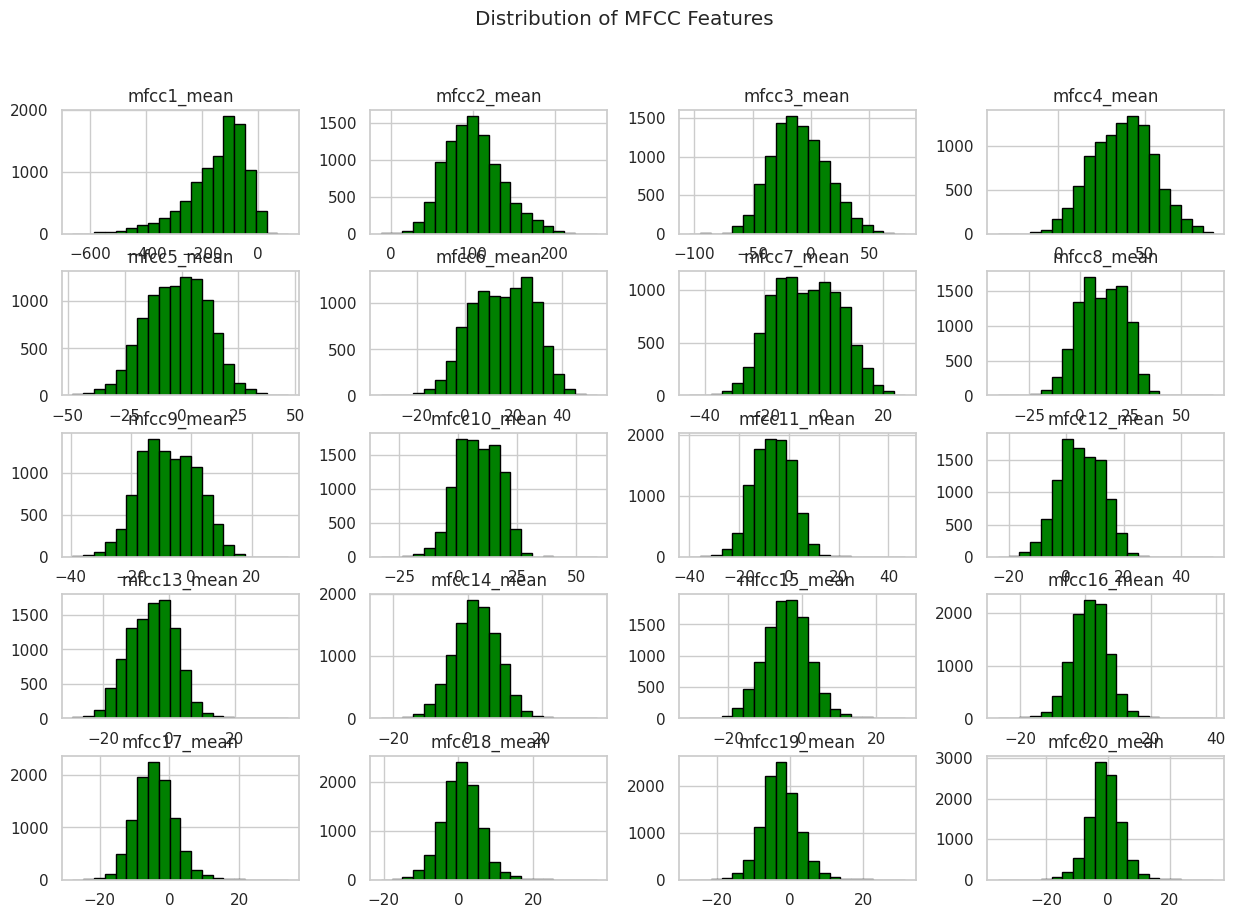

In [ ]:
mfcc_features = [f'mfcc{i}_mean' for i in range(1, 21)]
df_without_filename[mfcc_features].hist(bins=20, figsize=(15, 10), color='green', edgecolor='black')
plt.suptitle('Distribution of MFCC Features')
plt.show()

###Understanding How Certain Features Vary Across Different Genres or Classes

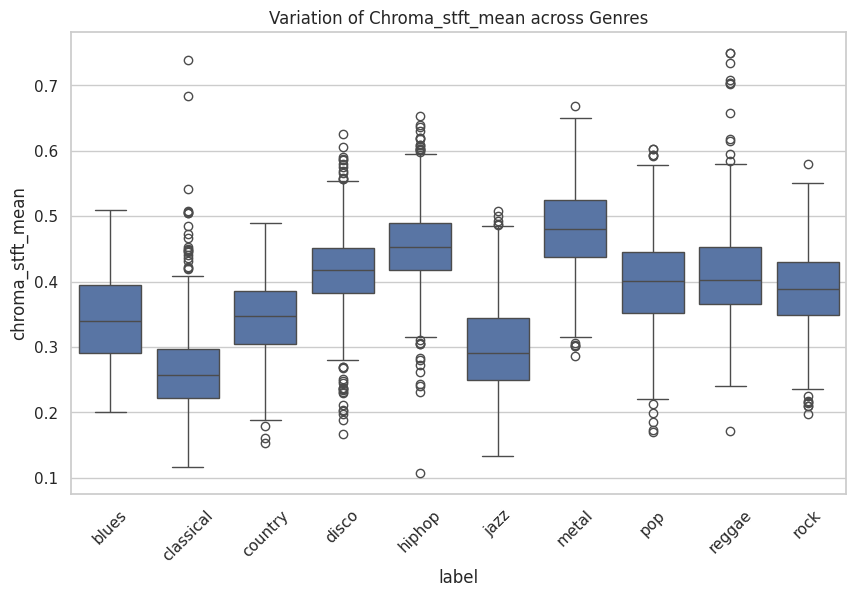

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='chroma_stft_mean', data=df_without_filename)
plt.title('Variation of Chroma_stft_mean across Genres')
plt.xticks(rotation=45)
plt.show()